### 해운대구 전체 인구현황에서 노인의 비율이 얼마나 되는지 확인

노인 기준?
현재 노인복지법에 따르면 만 65세 이상을 노인으로 규정짓고있다
하지만 최근 70대 부터를 노인으로 보자는 시선과 함께 현재 데이터 형식의 한계로 인하여
70세부터 노인으로 규정짓겠다.

In [1]:
import pandas as pd
population = pd.read_csv('부산광역시 해운대구_인구현황_20230430.csv', encoding='cp949')
population['연령']=population['연령'].str.replace(' ', '')

# 비노인 세대
not_old = ['0세-9세','10세-19세','20세-29세','30세-39세','40세-49세','50세-59세','60세-69세']

def check_in_b(row):
    if row['연령'] in not_old:
        return False
    else:
        return True

population['old?'] = population.apply(check_in_b, axis=1)

전체 인구수 대비 노인 비율

In [2]:
total = (population['인구수']).sum()
bunja = (population[population['old?']==True]['인구수']).sum()
ratio = round(bunja/total,3)
print(f'전체인구: {total}명, 노인인구: {bunja}명, 고령화비율: {round(ratio*100)}%')

전체인구: 384335명, 노인인구: 49778명, 고령화비율: 13%


동별 고령화비율

In [3]:
dong_list = population['동명'].unique()
dong_list
result_data = []
for dong in dong_list:
    dong_data = population[population['동명']==dong]
    total = dong_data['인구수'].sum()
    bunja = (dong_data[dong_data['old?']==True]['인구수']).sum()
    ratio = round(bunja/total,3)
    result_data.append({'동명': dong, '노인인구수': bunja, '전체인구': total, '노인비율': ratio*100})
    result_df = pd.DataFrame(result_data)

result_df=result_df.rename(columns={'노인비율': '고령화비율(%)'})
result_df
    

,동명,노인인구수,전체인구,고령화비율(%)
0,우제1동,3235,22171,14.6
1,우제2동,3411,30155,11.3
2,우제3동,3091,28129,11.0
3,중제1동,2996,27341,11.0
4,중제2동,1731,15354,11.3
5,좌제1동,1872,17559,10.7
6,좌제2동,3327,31067,10.7
7,좌제3동,2216,15531,14.3
8,좌제4동,2347,22419,10.5
9,송정동,1724,9548,18.1


독거노인 현황

In [4]:
alone = pd.read_csv('부산광역시 해운대구_독거노인 현황_20240213.csv',encoding='cp949')
alone.drop(columns=['연번','시도명','시군구명'],axis=1,inplace=True)
alone

,행정동명,남자(명),여자(명),합계(명)
0,우1동,406,885,1291
1,우2동,247,781,1028
2,우3동,185,633,818
3,중1동,320,782,1102
4,중2동,256,560,816
5,좌1동,149,540,689
6,좌2동,235,869,1104
7,좌3동,180,646,826
8,좌4동,141,579,720
9,송정동,249,564,813


In [5]:
alone_ratio = round(alone['합계(명)']/result_df['노인인구수'],3)
alone_elders = result_df.copy()
alone_elders['독거노인수']=alone['합계(명)']
alone_elders['노인_대비_독거노인비율(%)']=alone_ratio*100
alone_elders['전체인구중_독거노인비율(%)']=round(alone_elders['독거노인수']/alone_elders['전체인구'],3)*100
alone_elders=alone_elders[['동명','전체인구','노인인구수','고령화비율(%)','독거노인수','노인_대비_독거노인비율(%)','전체인구중_독거노인비율(%)']]
alone_elders

,동명,전체인구,노인인구수,고령화비율(%),독거노인수,노인_대비_독거노인비율(%),전체인구중_독거노인비율(%)
0,우제1동,22171,3235,14.6,1291,39.9,5.8
1,우제2동,30155,3411,11.3,1028,30.1,3.4
2,우제3동,28129,3091,11.0,818,26.5,2.9
3,중제1동,27341,2996,11.0,1102,36.8,4.0
4,중제2동,15354,1731,11.3,816,47.1,5.3
5,좌제1동,17559,1872,10.7,689,36.8,3.9
6,좌제2동,31067,3327,10.7,1104,33.2,3.6
7,좌제3동,15531,2216,14.3,826,37.3,5.3
8,좌제4동,22419,2347,10.5,720,30.7,3.2
9,송정동,9548,1724,18.1,813,47.2,8.5


해운대 종합병원 현황

In [6]:
general_hospital_in_haeundae = pd.read_csv('부산광역시_종합병원 현황_20230927.csv',encoding='cp949')
general_hospital_in_haeundae.drop(['연번','대표자'],axis=1,inplace=True)
general_hospital_in_haeundae=general_hospital_in_haeundae[general_hospital_in_haeundae['도로명주소'].str.contains('해운대')]
ghih = general_hospital_in_haeundae.drop(columns=['전화번호','일반','정신','인허가일자'],axis=1)
ghih

,의료기관명,도로명주소,위도,경도,계
26,의료법인 인당의료재단 해운대부민병원,부산광역시 해운대구 해운대로 584 (우동),35.161420,129.155656,357
27,인제대학교 해운대백병원,부산광역시 해운대구 해운대로 875 (좌동),35.173343,129.182181,890


## 종합병원 시각화

In [7]:
import folium
location1 = [35.161420,129.155656]
location2 = [35.173343,129.128181]
l1 = folium.Map(location=location1, zoom_start=14)
folium.Marker(location1).add_to(l1)
folium.Marker(location2).add_to(l1)
l1

### 해운대구 의료기관 현황

In [8]:
hospitals = pd.read_csv('부산광역시 해운대구_의료기관 현황_20230620.csv',encoding='cp949')
hospitals.drop(['순번','의료기관명','의료기관전화번호'],axis=1,inplace=True)
# 정규 표현식을 사용하여 '동'으로 끝나는 단어 추출
# 괄호 안에 있으며, '동'으로 끝나는 첫 번째 단어에 대해 매칭
hospitals['동'] = hospitals['의료기관주소(도로명)'].str.extract(r'\(([^,)]*동)')
hospitals.drop('의료기관주소(도로명)',axis=1,inplace=True)
hospitals = hospitals[['의료기관종별','동']].astype('category')

### 해운대구 의료기관 종류별 분포

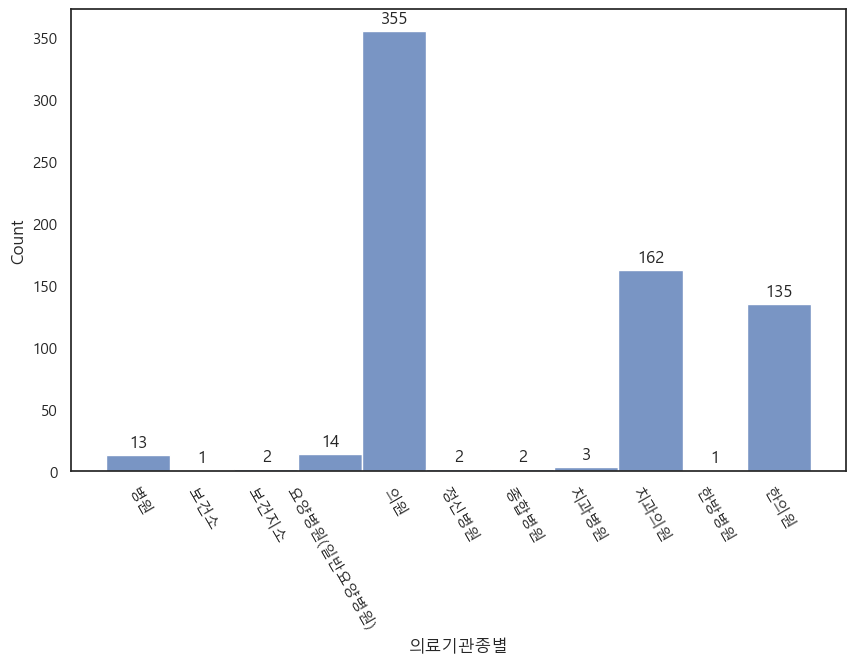

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 전체적인 설정
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

# 그래프의 크기 설정
plt.figure(figsize=(10, 6)) # 여기서 그래프의 크기를 조정할 수 있습니다.

# 히스토그램 그리기
ax = sns.histplot(data=hospitals, x='의료기관종별')

# x축 라벨의 각도 조정
plt.xticks(rotation=-60)

# 각 막대 위에 수치 표시하기
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


### 동별 의료기관 분포

In [10]:
#동별 의료기관 분포
grouped = hospitals.groupby(['동','의료기관종별']).size().reset_index(name='수')
grouped.groupby(['동','의료기관종별']).sum()

수
동   의료기관종별          
반송동 병원             0
    보건소            0
    보건지소           1
    요양병원(일반요양병원)   2
    의원            25
...               ..
중동  종합병원           0
    치과병원           1
    치과의원          24
    한방병원           0
    한의원           17

[77 rows x 1 columns]

### 노인 주간 보호 센터 현황

In [11]:
protect_noin = pd.read_csv('부산광역시 해운대구_노인주간보호센터_20230517.CSV',encoding='cp949')
protect_noin['동'] = protect_noin['소재지지번주소'].str.extract(r'([가-힣0-9]+동)\b')
protect_noin.drop('소재지지번주소',axis=1,inplace=True)
protect_noin['동']=protect_noin['동'].str.replace('1','')
protect_noin['동']=protect_noin['동'].str.replace('2','')
protect_noin['동']=protect_noin['동'].str.replace('3','')
protect_noin['동']=protect_noin['동'].astype('category')
protect_noin = protect_noin.groupby('동').size().reset_index(name='수')
protect_noin

,동,수
0,반송동,4
1,반여동,5
2,석대동,1
3,송정동,1
4,우동,4
5,재송동,4
6,좌동,11
